<a href="https://colab.research.google.com/github/Juancard/multi-label-classification-on-data-streamings/blob/master/20ng_clasificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install scikit-multilearn
!pip install liac-arff
!pip install requests

     |████████████████████████████████| 1.5MB 3.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 89 kB 2.6 MB/s 
  Created wheel for liac-arff: filename=liac_arff-2.4.0-py3-none-any.whl size=13333 sha256=473568827aef27ca98e063776fcb51f18f49304b568aedb2f35a7e3bcf41ece7
  Stored in directory: /root/.cache/pip/wheels/ba/2a/e1/6f7be2e2ea150e2486bff64fd6f0670f4f35f4c8f31c819fb8
Successfully built liac-arff


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
import os, sys
from skmultilearn.dataset import load_dataset, load_from_arff
import numpy as np
import pandas as pd
import seaborn as sns
TESIS_DIR="/content/drive/My Drive/tesis_cardona_mll_streaming"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def load_20ng_dataset():
  arff_path = os.path.join(TESIS_DIR, "datasets/20ng/meka/20NG-F.arff")
  N_LABELS = 20
  label_location="start"
  arff_file_is_sparse = False
  X_mulan, y_mulan, feature_names, label_names = load_from_arff(
    arff_path, 
    N_LABELS,
    label_location=label_location,
    load_sparse=arff_file_is_sparse,
    return_attribute_definitions=True
  )
  return X_mulan, y_mulan, feature_names, label_names

In [3]:
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
newsgroups_all = fetch_20newsgroups(subset='all')
newsgroups_all.target

array([10,  3, 17, ...,  3,  1,  7])

In [ ]:
newsgroups_all.data[0]
len(list(map(lambda x: x.split("/")[-1], newsgroups_all.filenames))), (list(map(lambda x: x.split("/")[-1], newsgroups_all.filenames)))

(18846,
 ['54367',
  '60215',
  '76120',
  '60771',
  '51882',
  '54198',
  '52099',
  '53767',
  '54033',
  '84236',
  '83609',
  '15596',
  '83506',
  '59022',
  '53347',
  '76476',
  '53899',
  '54203',
  '15463',
  '105204',
  '103698',
  '68177',
  '38296',
  '104900',
  '53878',
  '60903',
  '54726',
  '38295',
  '76833',
  '54189',
  '103781',
  '54414',
  '67270',
  '104820',
  '59198',
  '52153',
  '52060',
  '178702',
  '104509',
  '104339',
  '84216',
  '38245',
  '54318',
  '102769',
  '54538',
  '67202',
  '9868',
  '76845',
  '15816',
  '9505',
  '54095',
  '101569',
  '178676',
  '15950',
  '103121',
  '104332',
  '51256',
  '51747',
  '83509',
  '104583',
  '104770',
  '52028',
  '38523',
  '38880',
  '76157',
  '15353',
  '54099',
  '15741',
  '67225',
  '38694',
  '60732',
  '76541',
  '76756',
  '62373',
  '84332',
  '60216',
  '53629',
  '10783',
  '20590',
  '54030',
  '53560',
  '103135',
  '67015',
  '54261',
  '51644',
  '21691',
  '54713',
  '59245',
  '105242'

# Multi-label - Batch

## EDA

Usa dataset de Meka y se toma del siguiente enlace: https://sourceforge.net/projects/meka/files/Datasets/

In [ ]:
X_mulan, y_mulan, feature_names, label_names = load_20ng_dataset()

In [ ]:
print("Meka:")
print("Instancias: {}".format(X_mulan.shape[0]))
print("Features: {}".format(len(feature_names)))
print("Labels: {}".format(len(label_names)))
print("Labels por instancias (promedio): {}".format(round(y_mulan.sum(axis=1).mean(), 2)))
# print("Instancias de entrenamiento: {}".format(X_mulan_train.shape[0]))
# print("Instancias de testing: {}".format(X_mulan_test.shape[0]))

Meka:
Instancias: 19300
Features: 1006
Labels: 20
Labels por instancias (promedio): 1.03


In [ ]:
label_names, "---", feature_names[-10:]

([('comp.os_ms_windows_misc', ['0', '1']),
  ('religion.rmisc', ['0', '1']),
  ('rec.sport.baseball', ['0', '1']),
  ('sci.space', ['0', '1']),
  ('comp.sys.mac_hardware', ['0', '1']),
  ('sci.med', ['0', '1']),
  ('politics.pmisc', ['0', '1']),
  ('rec.autos', ['0', '1']),
  ('misc_forsale', ['0', '1']),
  ('politics.mideast', ['0', '1']),
  ('rec.motorcycles', ['0', '1']),
  ('politics.guns', ['0', '1']),
  ('rec.sport.hockey', ['0', '1']),
  ('comp.sys.ibm_pc_hardware', ['0', '1']),
  ('comp.graphics', ['0', '1']),
  ('sci.crypt', ['0', '1']),
  ('sci.electronics', ['0', '1']),
  ('religion.christian', ['0', '1']),
  ('religion.atheism', ['0', '1']),
  ('comp.windows_x', ['0', '1'])],
 '---',
 [('written', 'NUMERIC'),
  ('wrong', 'NUMERIC'),
  ('wrote', 'NUMERIC'),
  ('x11', 'NUMERIC'),
  ('xx', 'NUMERIC'),
  ('yeah', 'NUMERIC'),
  ('year', 'NUMERIC'),
  ('years', 'NUMERIC'),
  ('york', 'NUMERIC'),
  ('young', 'NUMERIC')])

## Problem Transformation - Binary Relevance


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import time

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_mulan, y_mulan, test_size=0.4)
x_train, x_test, y_train, y_test

(<11580x1006 sparse matrix of type '<class 'numpy.float64'>'
 	with 369957 stored elements in Compressed Sparse Row format>,
 <7720x1006 sparse matrix of type '<class 'numpy.float64'>'
 	with 249122 stored elements in Compressed Sparse Row format>,
 <11580x20 sparse matrix of type '<class 'numpy.longlong'>'
 	with 11927 stored elements in Compressed Sparse Row format>,
 <7720x20 sparse matrix of type '<class 'numpy.longlong'>'
 	with 7930 stored elements in Compressed Sparse Row format>)

In [ ]:
start=time.time()
classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

classifier.fit(x_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  103.0 seconds


In [ ]:
start=time.time()
y_hat=classifier.predict(x_test)
print('prediction time taken: ',round(time.time()-start,0),'seconds')

prediction time taken:  4.0 seconds


In [ ]:
import sklearn.metrics as metrics
def ml_accuracy(y_test, y_hat):
  def accuracy(x): 
    return 1 - np.mean(y_test.T[x] != y_hat.T[x])  
  return [accuracy(i) for i in range(y_test.shape[1])]

br_acc=ml_accuracy(y_test, y_hat)
br_f1=metrics.f1_score(y_test, y_hat, average='micro')
br_hamm=metrics.hamming_loss(y_test,y_hat)
print('Binary Relevance Accuracy (all):',br_acc)
print('Binary Relevance Accuracy (mean):',round(np.mean(br_acc),3))
print('Binary Relevance F1-score:',round(br_f1,3))
print('Binary Relevance Hamming Loss:',round(br_hamm,3))

Binary Relevance Accuracy (all): [0.9716321243523317, 0.9625647668393783, 0.9691709844559586, 0.9775906735751295, 0.9606217616580313, 0.9595854922279794, 0.9549222797927462, 0.9672279792746115, 0.9746113989637306, 0.9857512953367875, 0.9768134715025907, 0.972279792746114, 0.9832901554404144, 0.9610103626943006, 0.9610103626943006, 0.9839378238341968, 0.9516839378238344, 0.9737046632124353, 0.9665803108808291, 0.9647668393782385]
Binary Relevance Accuracy (mean): 0.969
Binary Relevance F1-score: 0.582
Binary Relevance Hamming Loss: 0.031


## Problem Transformation - Classifier Chains

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

In [ ]:
classifier = ClassifierChain(
    classifier = RandomForestClassifier(),
    require_dense = [False, True],
    order=[i for i in range(len(label_names))]
)
start=time.time()
classifier.fit(x_train,y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  101.0 seconds


In [ ]:
start=time.time()
y_hat=classifier.predict(x_test)
print('prediction time taken: ',round(time.time()-start,0),'seconds')

prediction time taken:  4.0 seconds


In [ ]:
br_acc=ml_accuracy(y_test, y_hat)
cc_f1=metrics.f1_score(y_test, y_hat, average='micro')
cc_hamm=metrics.hamming_loss(y_test,y_hat)
print('Classifier Chain Accuracy (all):',br_acc)
print('Classifier Chain Accuracy (mean):',round(np.mean(br_acc),3))
print('Classifier Chain F1-score:',round(cc_f1,3))
print('Classifier Chain Hamming Loss:',round(cc_hamm,3))

Classifier Chain Accuracy (all): [0.9712435233160622, 0.9629533678756478, 0.9691709844559586, 0.9768134715025907, 0.9591968911917099, 0.9593264248704665, 0.9556994818652851, 0.9686528497409327, 0.9757772020725389, 0.9865284974093264, 0.9787564766839378, 0.9735751295336788, 0.9848445595854922, 0.9611398963730571, 0.9633419689119171, 0.9832901554404144, 0.9525906735751297, 0.9737046632124353, 0.9668393782383421, 0.9615284974093266]
Classifier Chain Accuracy (mean): 0.969
Classifier Chain F1-score: 0.594
Classifier Chain Hamming Loss: 0.031


# Multi-label - Streaming

In [5]:
!pip install scikit-multiflow scikit-multilearn liac-arff

     |████████████████████████████████| 1.1 MB 3.5 MB/s 


In [6]:
from skmultiflow.meta.multi_output_learner import MultiOutputLearner
from skmultiflow.meta import ClassifierChain
from skmultiflow.trees import LabelCombinationHoeffdingTreeClassifier
from skmultiflow.core.pipeline import Pipeline
from skmultiflow.data.data_stream import DataStream
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model.perceptron import Perceptron
from skmultilearn.dataset import load_dataset
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
X_stream, y_stream, feature_names, label_names = load_20ng_dataset()
data_stream = DataStream(data=X_stream.todense(), y=y_stream.todense())
X_stream, y_stream

(<19300x1006 sparse matrix of type '<class 'numpy.float64'>'
 	with 619079 stored elements in List of Lists format>,
 <19300x20 sparse matrix of type '<class 'numpy.longlong'>'
 	with 19857 stored elements in List of Lists format>)

## Ordena dataset
Se debe ordenar el dataset para que el modelo funcione. Esto es, asegurarse que durante la fase de pre-entrenamiento, el modelo reciba ejemplos de cada clase de las labels. 

In [10]:
def unique_classes_per_label(a):
    b = np.sort(a,axis=0)
    return (b[1:] != b[:-1]).sum(axis=0)+1

unique_classes_per_label(y_stream.todense()[0:499])

matrix([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]])

Se observa que los primeros 500 ejemplos no poseen en sí mismos todas las clases en cada una de sus labels.   

In [11]:
idx_per_label = []
for label in range(0, data_stream.y.shape[1]):
    i = 0
    for row in data_stream.y:
        if row[label] == 1 and i not in idx_per_label:
            idx_per_label.append(i)
            break
        i += 1

test_ok = True
for i in range(0, data_stream.y.shape[1]):
    test_ok &= data_stream.y[idx_per_label[i]][i] == 1
print("idx_per_label se cargó correctamente") if test_ok else print("Falló el test")

idx_per_label se cargó correctamente


In [12]:
y_stream_sorted = np.append(
    data_stream.y[idx_per_label], 
    data_stream.y[ 
        [i for i in range(0,len(data_stream.y)) if i not in idx_per_label] 
    ],
    axis=0
)
y_stream_sorted

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
X_stream_sorted = np.append(
    data_stream.X[idx_per_label], 
    data_stream.X[ 
        [i for i in range(0,len(data_stream.X)) if i not in idx_per_label] 
    ],
    axis=0
)
data_stream.X, data_stream.X.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (19300, 1006))

In [14]:
unique_classes_per_label(y_stream_sorted[0:499])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Se observa que los primeros 500 ejemplos ahora sí poseen todas las clases.

## Binary Relevance

In [17]:
%matplotlib notebook
data_stream = DataStream(data=X_stream_sorted, y=y_stream_sorted)
classifier_br = MultiOutputLearner(
    Perceptron()
)
pipe_br = Pipeline([('classifier', classifier_br)])
evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=500, 
    max_samples=500000,
    metrics=["exact_match", "hamming_score", "hamming_loss", "running_time", "model_size"],
    output_file='results_br.csv'
)
evaluator.evaluate(stream=data_stream, model=pipe_br)

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 20 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [242.73s]
Processed samples: 19300
Mean performance:
M0 - Hamming score: 0.0332
M0 - Hamming loss : 0.9668
M0 - Exact matches: 0.5009
M0 - Training time (s)  : 200.96
M0 - Testing time  (s)  : 23.70
M0 - Total time    (s)  : 224.67
M0 - Size (kB)          : 653.0713


[Pipeline(steps=[('classifier',
                  MultiOutputLearner(base_estimator=Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False)))])]

<IPython.core.display.Javascript object>

## Classifier Chain

In [ ]:
%matplotlib notebook
data_stream = DataStream(data=X_stream_sorted, y=y_stream_sorted)
data_stream.prepare_for_use()
classifier_cc = ClassifierChain(
    Perceptron()
)
pipe_cc = Pipeline([('classifier', classifier_cc)])
evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=500, 
    max_samples=500000,
    metrics=["exact_match", "hamming_score", "hamming_loss", "running_time", "model_size"],
    output_file='results_cc.csv'
)
evaluator.evaluate(stream=data_stream, model=pipe_cc)

/usr/local/lib/python3.6/dist-packages/skmultiflow/data/base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 20 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [246.20s]
Processed samples: 19300
Mean performance:
M0 - Hamming score: 0.0334
M0 - Hamming loss : 0.9666
M0 - Exact matches: 0.5474
M0 - Training time (s)  : 194.19
M0 - Testing time  (s)  : 31.62
M0 - Total time    (s)  : 225.81
M0 - Size (kB)          : 659.6592


[Pipeline(steps=[('classifier',
                  ClassifierChain(base_estimator=Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False),
                                  order=None, random_state=None))])]

## Label Combination Hoeffding Tree

In [37]:
%matplotlib notebook
data_stream = DataStream(data=X_stream.todense(), y=y_stream.todense())
classifier_lcht = LabelCombinationHoeffdingTreeClassifier(
    n_labels=data_stream.n_targets
)
pipe_lcht = Pipeline([('classifier', classifier_lcht)])
evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=1930, 
    max_samples=500000,
    metrics=["exact_match", "hamming_score", "hamming_loss", "running_time", "model_size"],
    output_file='results_lcht.csv'
)
evaluator.evaluate(stream=data_stream, model=pipe_lcht)

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 20 target(s).
Pre-training on 1930 sample(s).
Evaluating...
 ##------------------ [10%] [176.19s]

/usr/local/lib/python3.6/dist-packages/skmultiflow/bayes/utils.py:37: RuntimeWarning: overflow encountered in double_scalars
  X[att_idx], class_index)
/usr/local/lib/python3.6/dist-packages/skmultiflow/utils/utils.py:62: RuntimeWarning: invalid value encountered in double_scalars
  dictionary[key] = value / factor


 ###----------------- [15%] [640.06s]Can not normalize, normalization factor is NaN
Processed samples: 2971
Mean performance:
M0 - Hamming score: 0.0117
M0 - Hamming loss : 0.9883
M0 - Exact matches: 0.2299
M0 - Training time (s)  : 278.54
M0 - Testing time  (s)  : 309.38
M0 - Total time    (s)  : 587.92
M0 - Size (kB)          : 15546.1094


/usr/local/lib/python3.6/dist-packages/skmultiflow/bayes/utils.py:37: RuntimeWarning: invalid value encountered in double_scalars
  X[att_idx], class_index)


[Pipeline(steps=[('classifier',
                  LabelCombinationHoeffdingTreeClassifier(binary_split=False,
                                                          grace_period=200,
                                                          leaf_prediction='nba',
                                                          max_byte_size=33554432,
                                                          memory_estimate_period=1000000,
                                                          n_labels=20,
                                                          nb_threshold=0,
                                                          no_preprune=False,
                                                          nominal_attributes=None,
                                                          remove_poor_atts=False,
                                                          split_confidence=1e-07,
                                                          split_criterion='info_gain',
     

<IPython.core.display.Javascript object>

## Stream Sintético

In [9]:
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import MultilabelGenerator
data_stream = DataStream(data=X_stream.todense(), y=y_stream.todense(), name="newsgroup20")
labels_por_instancia = y_stream.sum(axis=1).mean()

# por alguna razón la clase MultilabelGenerator no implementa el método has_more_classes
class MultilabelGenerator2( MultilabelGenerator ):
    def has_more_samples( self ):
        return self.n_remaining_samples() > 0
class ConceptDriftStream2(ConceptDriftStream):
    def prob_drift( self, batch_size=1):
        x = -4.0 * float(self.sample_idx - self.position) / float(self.width)
        probability_drift = 1.0 / (1.0 + np.exp(x))
        x, y = super().next_sample(batch_size)
        return probability_drift
    def next_sample(self, batch_size=1):
      """
        Copio y pego textual de next_sample. 
        Solo quito el planchado realizado sobre la matriz de etiquetas.
        "self.current_sample_y.flatten()" pasa a ser "self.current_sample_y"
      """
      self.current_sample_x = np.zeros((batch_size, self.n_features))
      self.current_sample_y = np.zeros((batch_size, self.n_targets))
      for j in range(batch_size):
          self.sample_idx += 1
          x = -4.0 * float(self.sample_idx - self.position) / float(self.width)
          probability_drift = 1.0 / (1.0 + np.exp(x))
          if self._random_state.rand() > probability_drift:
              X, y = self.stream.next_sample()
          else:
              X, y = self.drift_stream.next_sample()
          self.current_sample_x[j, :] = X
          self.current_sample_y[j, :] = y
      return self.current_sample_x, self.current_sample_y

ml_stream = MultilabelGenerator2(
  n_features=data_stream.n_features, 
  n_targets=data_stream.n_targets, 
  n_labels=labels_por_instancia,
  n_samples=10
)
s = ConceptDriftStream2(
    stream=data_stream, 
    drift_stream=ml_stream, 
    #position=15000,
    #width=1000
)
n=0

prob_drift_array = []
while s.has_more_samples():
  prob_drift_array.append(s.prob_drift())
  n+=1
print("Cantidad de ejemplos: ", n, " (cambia con cada corrida)")

Cantidad de ejemplos:  4173  (cambia con cada corrida)


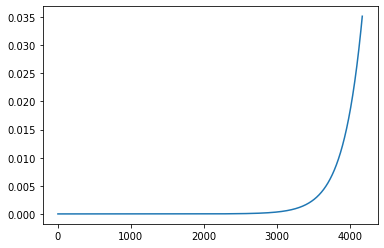

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(prob_drift_array)

In [32]:
%matplotlib notebook
classifier_br = MultiOutputLearner(
    Perceptron()
)
pipe_br = Pipeline([('classifier', classifier_br)])
evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=1000, 
    max_samples=1000000,
    metrics=["exact_match", "hamming_score", "hamming_loss", "running_time", "model_size"],
    output_file='results_br_stream_drift.csv'
)
s = ConceptDriftStream2(stream=data_stream, drift_stream=ml_stream)
s.restart()
evaluator.evaluate(stream=s, model=pipe_br)

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 20 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 ####---------------- [20%] [42.17s]Processed samples: 4269
Mean performance:
M0 - Hamming score: 0.0312
M0 - Hamming loss : 0.9688
M0 - Exact matches: 0.4494
M0 - Training time (s)  : 39.01
M0 - Testing time  (s)  : 4.54
M0 - Total time    (s)  : 43.55
M0 - Size (kB)          : 653.0713


[Pipeline(steps=[('classifier',
                  MultiOutputLearner(base_estimator=Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False)))])]

<IPython.core.display.Javascript object>

In [33]:
%matplotlib inline
df = pd.read_csv("results_br_stream_drift.csv", comment='#')
print(df.shape)
df.head()

(21, 11)


,id,mean_exact_match_[M0],current_exact_match_[M0],mean_hamming_score_[M0],current_hamming_score_[M0],mean_hamming_loss_[M0],current_hamming_loss_[M0],training_time_[M0],testing_time_[M0],total_running_time_[M0],model_size_[M0]
0,1000,1.000000,1.000000,0.050000,0.050000,0.950000,0.950000,0.464546,0.001641,0.466187,653.071289
1,1001,0.500000,0.500000,0.025000,0.025000,0.975000,0.975000,0.476935,0.003350,0.480286,653.071289
2,1002,0.333333,0.333333,0.016667,0.016667,0.983333,0.983333,0.495650,0.005734,0.501384,653.071289
3,1003,0.500000,0.500000,0.025000,0.025000,0.975000,0.975000,0.507601,0.007175,0.514776,653.071289
4,1004,0.600000,0.600000,0.030000,0.030000,0.970000,0.970000,0.519243,0.008630,0.527873,653.071289


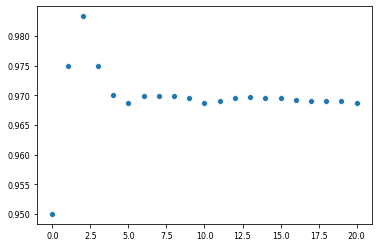

In [34]:
sns.scatterplot(data=df["mean_hamming_loss_[M0]"])

In [35]:
df

,id,mean_exact_match_[M0],current_exact_match_[M0],mean_hamming_score_[M0],current_hamming_score_[M0],mean_hamming_loss_[M0],current_hamming_loss_[M0],training_time_[M0],testing_time_[M0],total_running_time_[M0],model_size_[M0]
0,1000,1.000000,1.000000,0.050000,0.050000,0.950000,0.950000,0.464546,0.001641,0.466187,653.071289
1,1001,0.500000,0.500000,0.025000,0.025000,0.975000,0.975000,0.476935,0.003350,0.480286,653.071289
2,1002,0.333333,0.333333,0.016667,0.016667,0.983333,0.983333,0.495650,0.005734,0.501384,653.071289
3,1003,0.500000,0.500000,0.025000,0.025000,0.975000,0.975000,0.507601,0.007175,0.514776,653.071289
4,1004,0.600000,0.600000,0.030000,0.030000,0.970000,0.970000,0.519243,0.008630,0.527873,653.071289
5,1199,0.475000,0.475000,0.031250,0.031250,0.968750,0.968750,2.835492,0.280004,3.115495,653.071289
6,1399,0.457500,0.440000,0.030125,0.029000,0.969875,0.971000,5.232672,0.560568,5.793240,653.071289
7,1599,0.445000,0.420000,0.030167,0.030250,0.969833,0.969750,7.631577,0.842082,8.473659,653.071289
8,1799,0.443750,0.440000,0.030125,0.030000,0.969875,0.970000,10.032769,1.121558,11.154327,653.071289
9,1999,0.450000,0.475000,0.030500,0.032000,0.969500,0.968000,12.484111,1.410503,13.894614,653.071289


In [71]:
#s.restart()
X, y = ml_stream.next_sample(1)
y

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [72]:
labels_sample = list(y.flat)
labels_name_of_sample = [label_names[idx][0] for idx, _ in filter(lambda x: x[1]==1, enumerate(labels_sample)) ]
print("Instancia tiene etiquetas: {}".format(labels_name_of_sample))

Instancia tiene etiquetas: ['sci.space']


In [73]:
features_mask = [X > 0][0][0]
features_sample = np.array([i[0] for i in feature_names])[features_mask]
features_sample

array(['01', '04', '28', '30', '45', '50', '60', '75u', 'americans',
       'application', 'apr', 'aren', 'bhj', 'bible', 'board', 'build',
       'building', 'cars', 'christianity', 'citizens', 'considered',
       'costs', 'dead', 'didn', 'discussion', 'disk', 'double', 'due',
       'eric', 'figure', 'fire', 'freedom', 'giving', 'history',
       'insurance', 'interface', 'language', 'league', 'make', 'memory',
       'mention', 'month', 'moral', 'muslims', 'network', 'note', 'ofthe',
       'purpose', 'reply', 'richard', 'rules', 'school', 'screen',
       'shuttle', 'speed', 'started', 'stated', 'study', 'technical',
       'tm', 'total', 'video', 'widget', 'xx'], dtype='<U14')

array([False, False, False, ..., False, False, False])